The notebook outlines the telescope pointing routine to a LEO satellite from NORAD catalogue based on Two-Line Elements (TLE) data. The illustration below shows the baseline geometry of the mathematical model.

<!-- ![pointing_geometry.png](attachment:pointing_geometry.png) -->
<img src="pointing_geometry.png" width="500" height="340"> 

Two reference frameы are depicted. Earth-centered Earth-fixed (ECEF) denoted as $\textit{OXYZ}$ is used to specify the location of the observatory on the Earth. Local reference frame $\textit{oxyz}$ originates at the observatory location, x-axis points toward North, z-axis points to zenith direction, y-axis completes orthonormal reference frame to the right-handed triad. The reference frame is used to specify azimuth $\alpha$ and elevation $\beta$ of a satellite as seen from the observatory location.

$\mathbf{R}_{obs}$ represents observatory position vector given ECEF frame $\textit{OXYZ}$.

$\mathbf{R}_{sat}$ represents satellites position vector given ECEF frame $\textit{OXYZ}$.

In order to find azimuth and elevation of a satellite for a particular time step the following procedure is used:

1. Propagate satellite state to obtain satellite position $\mathbf{R}_{sat}$ at time t. 
    Let us use SGP4 propagator that utilizes NORAD TLE as an input as a standard in the aerospace industry. The SGP4 outputs position and velocity given in ECI frame (TEME). It should be converted to ECEF frame where there observatory location is represented.
2. Find vector $\mathbf{r}$ pointing from the observatory to the satellite.
3. Find satellite azimuth $\alpha$ and elevation $\beta$ as seen from the observatory by transforming $\mathbf{r}$ to local reference frame $\textit{oxyz}$ and then calculating the required angles as shown in illustration above.
   
Repeat the routine to obtain relative satellite trajectory arc, namely $\alpha(t)$, $\beta(t)$.

In order to find a set of satellites visible at the observatory for a given time span $\Delta t$ the following procedure is used:
1. Propagate satellite state for the time span $\Delta t$
2. Convert observatory position vector to ECI frame to for a given time span for further line-of-sight analysis
3. Calculate satellite elevation $\beta$ during the time span
4. A set of satellites is defined by the constraint $\beta > \beta_{min}$, where $\beta_{min}$ is critical satellite elevation for the observations.


TODO:
1. Check SGPF4 documentation and provide propagator precison position. Add data to the notebook description (Fatima, Shamil)
2. A routine to calculate satellite elevation and discard a satellite if it has no elevation above certain threshold, $\beta_{min}$ (Shami, Fatima)
3. For a feasible satellite provide satellite position data for viable observation time when satellite is above minimum required elevation (Shamil, Fatima)

In [2]:
from consts import *
import numpy as np

# Defines location of the observatory 
# Data are taken from google map, Add data from Konstantin
latitude_obs = 24.178416871640632 * np.pi / 180
longitude_obs = 54.68951437347364 * np.pi / 180

# The position vector is given for the case of spherical Earth, meaning Earth oblateness is not taken into account. This can be later improved
r_obs_ecef = np.vstack([Consts.rEarth * np.cos(latitude_obs) * np.cos(longitude_obs), Consts.rEarth * np.cos(latitude_obs) * np.sin(longitude_obs), Consts.rEarth * np.sin(latitude_obs)])  

r_obs_ecef_mag = np.linalg.norm(r_obs_ecef)

print(r_obs_ecef, r_obs_ecef_mag)

[[3359439.45277626]
 [4742865.78015446]
 [2609434.12115561]] 6371009.0


In [33]:
# Define observation time span

from datetime import datetime, timedelta
from astropy.time import Time
import pandas as pd

# Define start and end date with specific time
# Datetime is given in UTC format
# Abu Dhabi time zone is UTC+4

start_date = "2024-11-01 13:00:00" # given in UTC
end_date = "2024-11-01 15:00:00"   # given in UTC

observation = np.array([datetime(year=2014, month=2, day=8) + timedelta(hours=offset)
                        for offset in np.linspace(0, 24, 100)])

# Generates a range of datetimes with certain frequency
t_span = pd.date_range(start=start_date, end=end_date, freq='30s')

# Converts to a list of strings if needed?
gregorian_dates = t_span.strftime("%Y-%m-%d %H:%M:%S").tolist()

# Converts to Julian Date
julian_dates = Time(gregorian_dates, format='iso').jd


np.size(gregorian_dates)
print(julian_dates)
print(observation)

[2460616.04166667 2460616.04201389 2460616.04236111 2460616.04270833
 2460616.04305556 2460616.04340278 2460616.04375    2460616.04409722
 2460616.04444444 2460616.04479167 2460616.04513889 2460616.04548611
 2460616.04583333 2460616.04618056 2460616.04652778 2460616.046875
 2460616.04722222 2460616.04756944 2460616.04791667 2460616.04826389
 2460616.04861111 2460616.04895833 2460616.04930556 2460616.04965278
 2460616.05       2460616.05034722 2460616.05069444 2460616.05104167
 2460616.05138889 2460616.05173611 2460616.05208333 2460616.05243056
 2460616.05277778 2460616.053125   2460616.05347222 2460616.05381944
 2460616.05416667 2460616.05451389 2460616.05486111 2460616.05520833
 2460616.05555556 2460616.05590278 2460616.05625    2460616.05659722
 2460616.05694444 2460616.05729167 2460616.05763889 2460616.05798611
 2460616.05833333 2460616.05868056 2460616.05902778 2460616.059375
 2460616.05972222 2460616.06006944 2460616.06041667 2460616.06076389
 2460616.06111111 2460616.06145833 246

In [39]:
from conversions import *

# calculates station coordinates in ECI for the given time span

r_obs_eci_array = np.empty([3, 0], float)

r = ecef_to_eci(r_obs_ecef, observation[10])

# r_obs_eci_array = np.concatenate((r_obs_eci_array, r), axis=1)
# r_obs_eci_array = np.concatenate((r_obs_eci_array, r), axis=1)

# print(r_obs_eci_array)

#for gd in gregorian_dates:

    #r_obs_eci_array = np.concatenate((r_obs_eci_array, ecef_to_eci(r_obs_ecef, gd)), axis=1)
    
    
# print(np.repeat(r_obs_ecef, np.size(gregorian_dates), axis=1))
# print(a)

# for jd in julian_dates:
    
#     julian_century = (jd - 2451545.0) / 36525.0
#     ecef_to_eci_rotation = rotation_matrix_ecef_to_eci(julian_century)
#     ecef_to_eci(r_obs_ecef, gregorian_dates[0])
#     r_obs_eci_array = np.concatenate((r_obs_eci_array, np.matmul(ecef_to_eci_rotation, r_obs_ecef)), axis=1)
    
# # print(np.size(r_obs_eci_array, axis=1))

# r_obs_eci_mag_array = np.linalg.norm(r_obs_eci_array, axis=0)
# print(r_obs_eci_mag_array)

print(r_obs_eci_mag_array)

# fig, ax = plt.subplots()
# ax.plot(julian_dates, r_obs_eci_mag_array)
# plt.show()

# print(r_obs_eci_mag_array)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot(r_obs_eci_array[0,:], r_obs_eci_array[1,:], r_obs_eci_array[2,:], label='Observatory position given in ECI')
# ax.set(xlabel='x, m', ylabel='y, m', zlabel='z, m')
# ax.grid()
# ax.legend()
# plt.show()
# fig.savefig("observatory trajectory.png")


NameError: name 'r_obs_eci_mag_array' is not defined

In [6]:
from conversions import *

# calculates station coordinates in ECI for the given time span

r_obs_eci_array = np.empty([3, 0], float)

r = ecef_to_eci(r_obs_ecef, gregorian_dates[10])

# r_obs_eci_array = np.concatenate((r_obs_eci_array, r), axis=1)
# r_obs_eci_array = np.concatenate((r_obs_eci_array, r), axis=1)

# print(r_obs_eci_array)

for gd in gregorian_dates:

    r_obs_eci_array = np.concatenate((r_obs_eci_array, ecef_to_eci(r_obs_ecef, gd)), axis=1)
    
    
# print(np.repeat(r_obs_ecef, np.size(gregorian_dates), axis=1))
# print(a)

# for jd in julian_dates:
    
#     julian_century = (jd - 2451545.0) / 36525.0
#     ecef_to_eci_rotation = rotation_matrix_ecef_to_eci(julian_century)
#     ecef_to_eci(r_obs_ecef, gregorian_dates[0])
#     r_obs_eci_array = np.concatenate((r_obs_eci_array, np.matmul(ecef_to_eci_rotation, r_obs_ecef)), axis=1)
    
# # print(np.size(r_obs_eci_array, axis=1))

# r_obs_eci_mag_array = np.linalg.norm(r_obs_eci_array, axis=0)
# print(r_obs_eci_mag_array)

fig, ax = plt.subplots()
ax.plot(julian_dates, r_obs_eci_mag_array)
plt.show()

print(r_obs_eci_mag_array)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot(r_obs_eci_array[0,:], r_obs_eci_array[1,:], r_obs_eci_array[2,:], label='Observatory position given in ECI')
# ax.set(xlabel='x, m', ylabel='y, m', zlabel='z, m')
# ax.grid()
# ax.legend()
# plt.show()
# fig.savefig("observatory trajectory.png")


AttributeError: 'str' object has no attribute 'year'

In [6]:
from conversions import *

# calculates station coordinates in ECI for the given time span

r_obs_eci_array = np.empty([3, 0], float)

r = ecef_to_eci(r_obs_ecef, gregorian_dates[10])

# r_obs_eci_array = np.concatenate((r_obs_eci_array, r), axis=1)
# r_obs_eci_array = np.concatenate((r_obs_eci_array, r), axis=1)

# print(r_obs_eci_array)

for gd in gregorian_dates:

    r_obs_eci_array = np.concatenate((r_obs_eci_array, ecef_to_eci(r_obs_ecef, gd)), axis=1)
    
    
# print(np.repeat(r_obs_ecef, np.size(gregorian_dates), axis=1))
# print(a)

# for jd in julian_dates:
    
#     julian_century = (jd - 2451545.0) / 36525.0
#     ecef_to_eci_rotation = rotation_matrix_ecef_to_eci(julian_century)
#     ecef_to_eci(r_obs_ecef, gregorian_dates[0])
#     r_obs_eci_array = np.concatenate((r_obs_eci_array, np.matmul(ecef_to_eci_rotation, r_obs_ecef)), axis=1)
    
# # print(np.size(r_obs_eci_array, axis=1))

# r_obs_eci_mag_array = np.linalg.norm(r_obs_eci_array, axis=0)
# print(r_obs_eci_mag_array)

fig, ax = plt.subplots()
ax.plot(julian_dates, r_obs_eci_mag_array)
plt.show()

print(r_obs_eci_mag_array)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot(r_obs_eci_array[0,:], r_obs_eci_array[1,:], r_obs_eci_array[2,:], label='Observatory position given in ECI')
# ax.set(xlabel='x, m', ylabel='y, m', zlabel='z, m')
# ax.grid()
# ax.legend()
# plt.show()
# fig.savefig("observatory trajectory.png")


AttributeError: 'str' object has no attribute 'year'

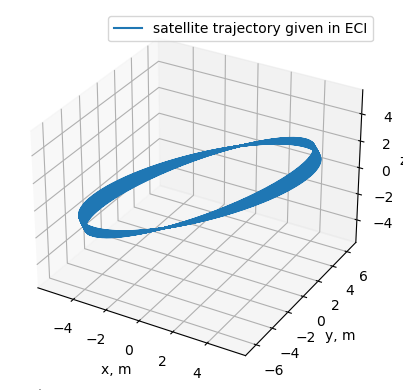

[-4898044.78672443 -3657530.64209398 -3263954.173544  ]


<Figure size 640x480 with 0 Axes>

In [163]:
# Propagats satellite state using SGP4 propagator for the given time span

from sgp4.api import Satrec

s = "1 44714U 19074B   24303.16471469  .00014028  00000+0  95926-3 0  9999"
t = "2 44714  53.0541 255.6079 0001757  96.6875 263.4314 15.06381615274085"

satellite = Satrec.twoline2rv(s, t)

# Propagates satellite state for the t_span
positionsX = []
positionsY = []
positionsZ = []

r_sat_eci_array = np.empty([3, 0], float)

for jd in julian_dates:

    # Propagate
    e, r, v = satellite.sgp4(jd, 0)
    
    if e == 0:
        positionsX.append(r[0] * 1e3)
        positionsY.append(r[1] * 1e3)
        positionsZ.append(r[2] * 1e3)
    
        r_sat_eci_array = np.concatenate((r_sat_eci_array, np.vstack([r[0] * 1e3, r[1] * 1e3, r[2] * 1e3])), axis=1)

    else:
        positionsX.append(None)  # Error in propagation
        positionsY.append(None)  # Error in propagation
        positionsY.append(None)  # Error in propagation

gregorian_dates = Time(julian_dates, format='jd').to_datetime()

sat1Data = np.array([gregorian_dates, positionsX, positionsY, positionsZ]).T

sat1 = pd.DataFrame(sat1Data, columns=["Date and Time", "X, km", "Y, km", "Z, km"])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(r_sat_eci_array[0,:], r_sat_eci_array[1,:], r_sat_eci_array[2,:], label='satellite trajectory given in ECI')
ax.set(xlabel='x, m', ylabel='y, m', zlabel='z, m')
ax.grid()
ax.legend()
plt.show()
plt.savefig("satellite trajectory.pdf")

print(r_sat_eci_array[:, 0])
# print("Satellite 1 Position Data")
# print(sat1)

# print(np.size(r_sat_eci_array, axis=1))

6601


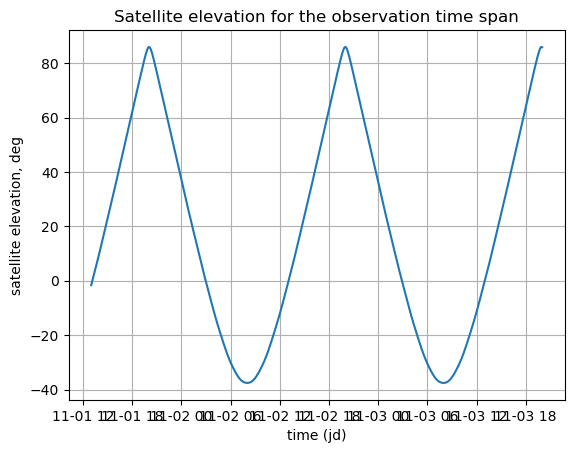

In [41]:
# Calculates satellite elevation \beta for the given t_span
# Check if satellite goes above minimum required elevation

# r_relative = r_sat_eci_array[:, 0] - r_obs_eci_array[:, 0]
# e_relative = r_relative / np.linalg.norm(r_relative)

# e_sat = r_sat_eci_array[:, 0] / np.linalg.norm(r_sat_eci_array[:, 0])

# elevation = np.pi / 2 - np.arccos(np.dot(e_sat, e_relative))

# print(elevation)

elevation_array = []
elevation_array_deg = []

print(np.size(r_sat_eci_array, axis=1))

for time_idx in range(np.size(julian_dates)):

    r_relative = r_sat_eci_array[:, time_idx] - r_obs_eci_array[:, time_idx]
    e_relative = r_relative / np.linalg.norm(r_relative)
    e_sat = r_sat_eci_array[:, 0] / np.linalg.norm(r_sat_eci_array[:, 0])

    elevation_array.append(np.pi / 2 - np.arccos(np.dot(e_sat, e_relative)))
    elevation_array_deg.append((np.pi / 2 - np.arccos(np.dot(e_sat, e_relative))) * 180 / np.pi)

condition = elevation_array > np.repeat(0, np.size(julian_dates))

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.plot(julian_dates, elevation_array_deg)

ax.set(xlabel='time (jd)', ylabel='satellite elevation, deg',
       title='Satellite elevation for the observation time span')
ax.grid()

fig.savefig("test.png")
plt.show()

In [22]:
import numpy as np
from calc_local_bases_axes import *

lat = 0
lon = 0
print(lat, lon)

A = calc_local_bases_axes(lat, lon)

print(A)
Rsat = np.vstack([positionsX[0], positionsY[0], positionsZ[0]])

r = R_ECEF - Robs

rTransformed = np.matmul(A, r)

az, decl = calc_local_azimuth_and_declination(rTransformed)

# print(r)

# print(rTransformed)

print(az * 180 / np.pi, decl * 180 / np.pi)

0 0
[[-0.  1.  0.]
 [-0. -0.  1.]
 [ 1.  0.  0.]]


NameError: name 'R_ECEF' is not defined

In [7]:
from datetime import datetime, timedelta

from conversions import *

# Convert UTC time to Julian Century
observation_time =  datetime(year=2021, month=3, day=19, hour=7, second=41)
julian_date = utc_time_to_julian_date(observation_time)
julian_century = (julian_date - 2451545.0) / 36525.0

# Compute the rotation matrix
ecef_to_eci_rotation = rotation_matrix_ecef_to_eci(julian_century)
print(ecef_to_eci_rotation)

[[ 2.07067703e-01  9.78324511e-01  2.02939438e-03]
 [-9.78326529e-01  2.07068110e-01  9.76248199e-06]
 [-4.10671983e-04 -1.98743186e-03  9.99997941e-01]]
